# Cereal Nutrition Data

According to Statista data based on the U.S. Census data and Simmons National Consumer Survey (NHCS), 283.39 million -- 87% of -- Americans consumed breakfast cereals (cold) in 2020. While cold cereal is clearly a staple breakfast food in the United States, is it really providing the nutritional value our bodies need to start the day?

Medical experts from _Healthline_ recommend people eat nutrient-dense breakfast food which "may provide long-lasting energy and keep you full for hours. These foods are typically high in fiber, protein, healthy fats, and micronutrients." 

Today, I will explore:
* Which cereal manufacturers are providing the most nutrient-dense cereals, and which ones are providing the least
* How the top nuritional content of the top-5 rated cereals compares to the lowest-5 rated cereals

**Sources**

Statista: https://www.statista.com/statistics/279999/us-households-consumption-of-breakfast-cereals-cold/

Healthline: https://www.healthline.com/nutrition/12-best-foods-to-eat-in-morning 

Kaggle Dataset: https://www.kaggle.com/crawford/80-cereals

In [358]:
#Import pandas, matplotlib.pyplot, seaborn, numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [359]:
#Import cereal nutrition data set
cereal_data = pd.read_csv('')

### Review Dataset

In [360]:
#Call head on cereal data to see first five rows
cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [361]:
#Call info to see data types
cereal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [362]:
#Confirm no data is missing from dataset
cereal_data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [363]:
#Rename values in manufacturer(mfr) column to manufacturer names for easy interpretation
cereal_data['mfr'] = cereal_data['mfr'].replace({'A': 'AHF Products', 'G': 'General Mills', 'K': 'Kelloggs', 'N': 'Nabisco', 'P': 'Post','Q': 'Quaker Oats',  'R': 'Ralston Purina'})

In [364]:
#Confirm mfr column values are updated
cereal_data['mfr'].unique()

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina',
       'General Mills', 'Post', 'AHF Products'], dtype=object)

### Which cereal manufacturers produce the highest nutrient-dense cereal on average, and which ones produce the least nutritional?

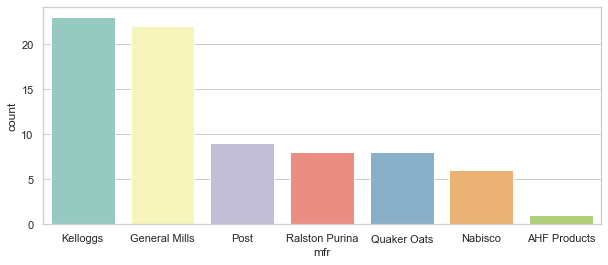

In [365]:
#Number of cereal types per manufacturer
order = ['Kelloggs', 'General Mills', 'Post', 'Ralston Purina', 'Quaker Oats', 'Nabisco', 'AHF Products']
sns.set_theme(style="whitegrid")
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="mfr", data=cereal_data, palette="Set3", order=order)

Kelloggs and General Mills clearly produce the highest amount of cereals but how do their products compare?

<AxesSubplot:xlabel='mfr', ylabel='sugars'>

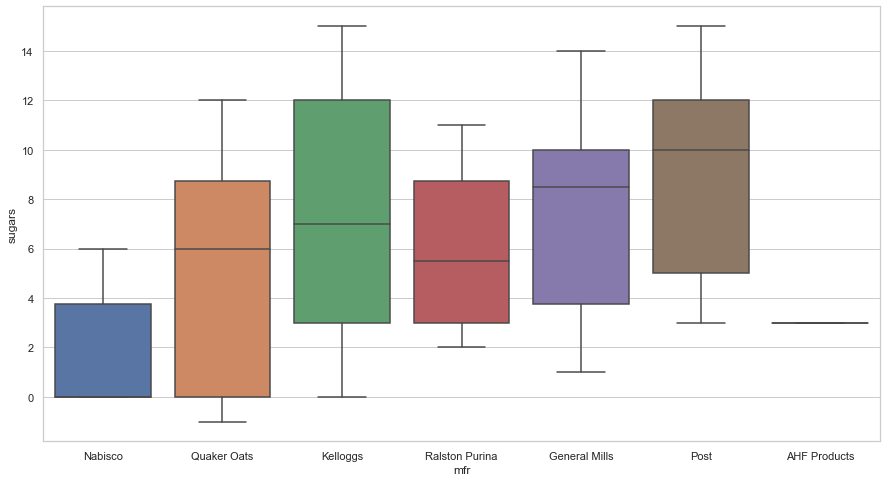

In [366]:
#Boxplot to show range and averages of sugar content for each brand 
plt.figure(figsize = (15,8))
sns.boxplot(x=cereal_data["mfr"], y=cereal_data["sugars"])

Looking at median values, Post produces cereals with the highest sugar content on average, followed by General Mills and Kelloggs. Kelloggs, Post, and General Mills also produce the top three cereals with the highest sugar content. Let's confirm below.

In [367]:
#View cereals with highest sugar content per serving size
cereal_data.sort_values(by=['sugars'], ascending=False).head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
66,Smacks,Kelloggs,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
30,Golden Crisp,Post,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
70,Total Raisin Bran,General Mills,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
52,Post Nat. Raisin Bran,Post,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
6,Apple Jacks,Kelloggs,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094


<AxesSubplot:xlabel='mfr', ylabel='calories'>

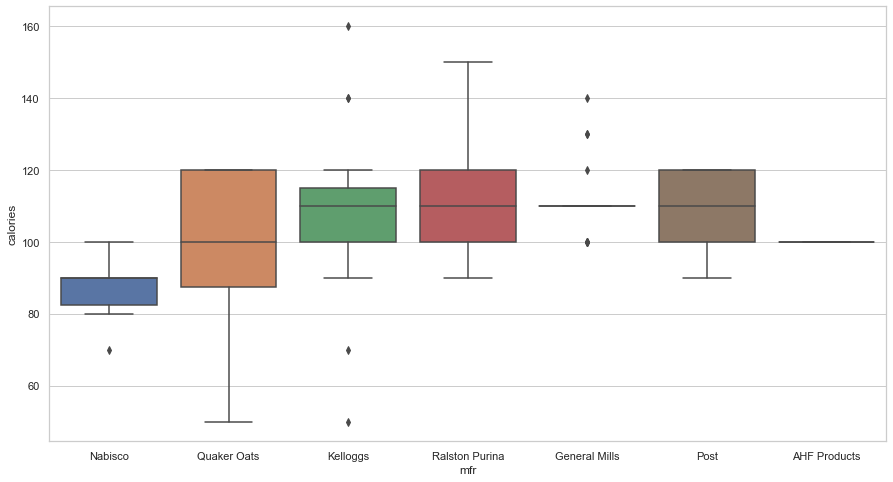

In [368]:
#Boxplot to show range of calorie content for each brand
plt.figure(figsize = (15,8))
sns.boxplot(x=cereal_data["mfr"], y=cereal_data["calories"])

Looking at median values, Kelloggs, Post, General Mills, and Ralston Purina are all comparable in terms of average calorie content per cereal type. Kelloggs produces a couple high-calorie cereal brands that are outliers compared to the rest of its products, and 25% of Ralston Purina's products fall into the higher end of caloric content (120-150 calories per serving). Let's confirm below.

In [369]:
#View cereals with highest caloric content per serving size
cereal_data.sort_values(by=['calories'], ascending=False).head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
46,Mueslix Crispy Blend,Kelloggs,C,160,3,2,150,3.0,17.0,13,160,25,3,1.5,0.67,30.313351
44,Muesli Raisins; Dates; & Almonds,Ralston Purina,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,Ralston Purina,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765
70,Total Raisin Bran,General Mills,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785
39,Just Right Fruit & Nut,Kelloggs,C,140,3,1,170,2.0,20.0,9,95,100,3,1.3,0.75,36.471512


Now, let's review the manufacturers producing the highest nutrient-dense cereals, solely looking at protein, fiber, and vitamin content, on average.

In [370]:
#Create new DF with protein, fiber, vitamin averages per manufacturer
mfr_health = cereal_data.groupby('mfr')[['protein', 'fiber', 'vitamins']].mean()
mfr_health.reset_index(inplace=True) 
mfr_health.head(10)

,mfr,protein,fiber,vitamins
0,AHF Products,4.000000,0.000000,25.000000
1,General Mills,2.318182,1.272727,35.227273
2,Kelloggs,2.652174,2.739130,34.782609
3,Nabisco,2.833333,4.000000,8.333333
4,Post,2.444444,2.777778,25.000000
5,Quaker Oats,2.625000,1.337500,12.500000
6,Ralston Purina,2.500000,1.875000,25.000000


In [371]:
#Melt the dataframe to make it suitable for barplot
df = pd.melt(mfr_health, "mfr", var_name="measurement")
df.head()

,mfr,measurement,value
0,AHF Products,protein,4.000000
1,General Mills,protein,2.318182
2,Kelloggs,protein,2.652174
3,Nabisco,protein,2.833333
4,Post,protein,2.444444


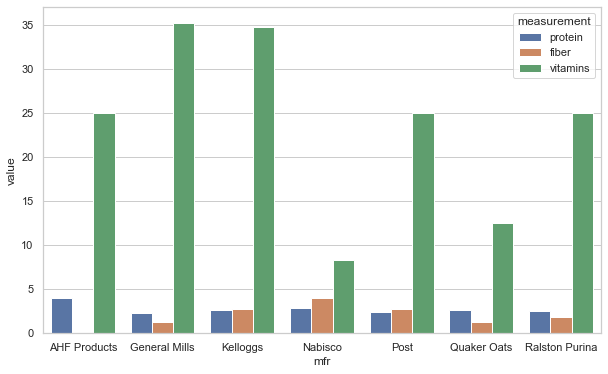

In [372]:
#Plot the protein, fiber, vitamins data for each manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(x="mfr", hue="measurement", y="value", data=df)
plt.show()

On average, General Mills produces the highest vitamin content per cereal, Nabisco produces the highest fiber content per cereal, and AHF Products produces the highest protein content per cereal.

**In conclusion, simply looking at how the average nutritional value compares for each brand is not a sufficent way to determine which brand produces healither cereals and which ones produce unhealthy cereals. Kelloggs and General Mills are the highest producers of cereal brands so it makes sense they produce cereals that both fall on the higher end of the unhealthy spectrum (in terms of high in sugar and caloric content) and cereals that fall on the higher end of the healthy spectrum (in terms of fiber, protein, and vitamins).**

**Instead of looking at a manufacturer-to-manufacturer comparison, let's look at the cereals' nutritional value on an individual basis.**

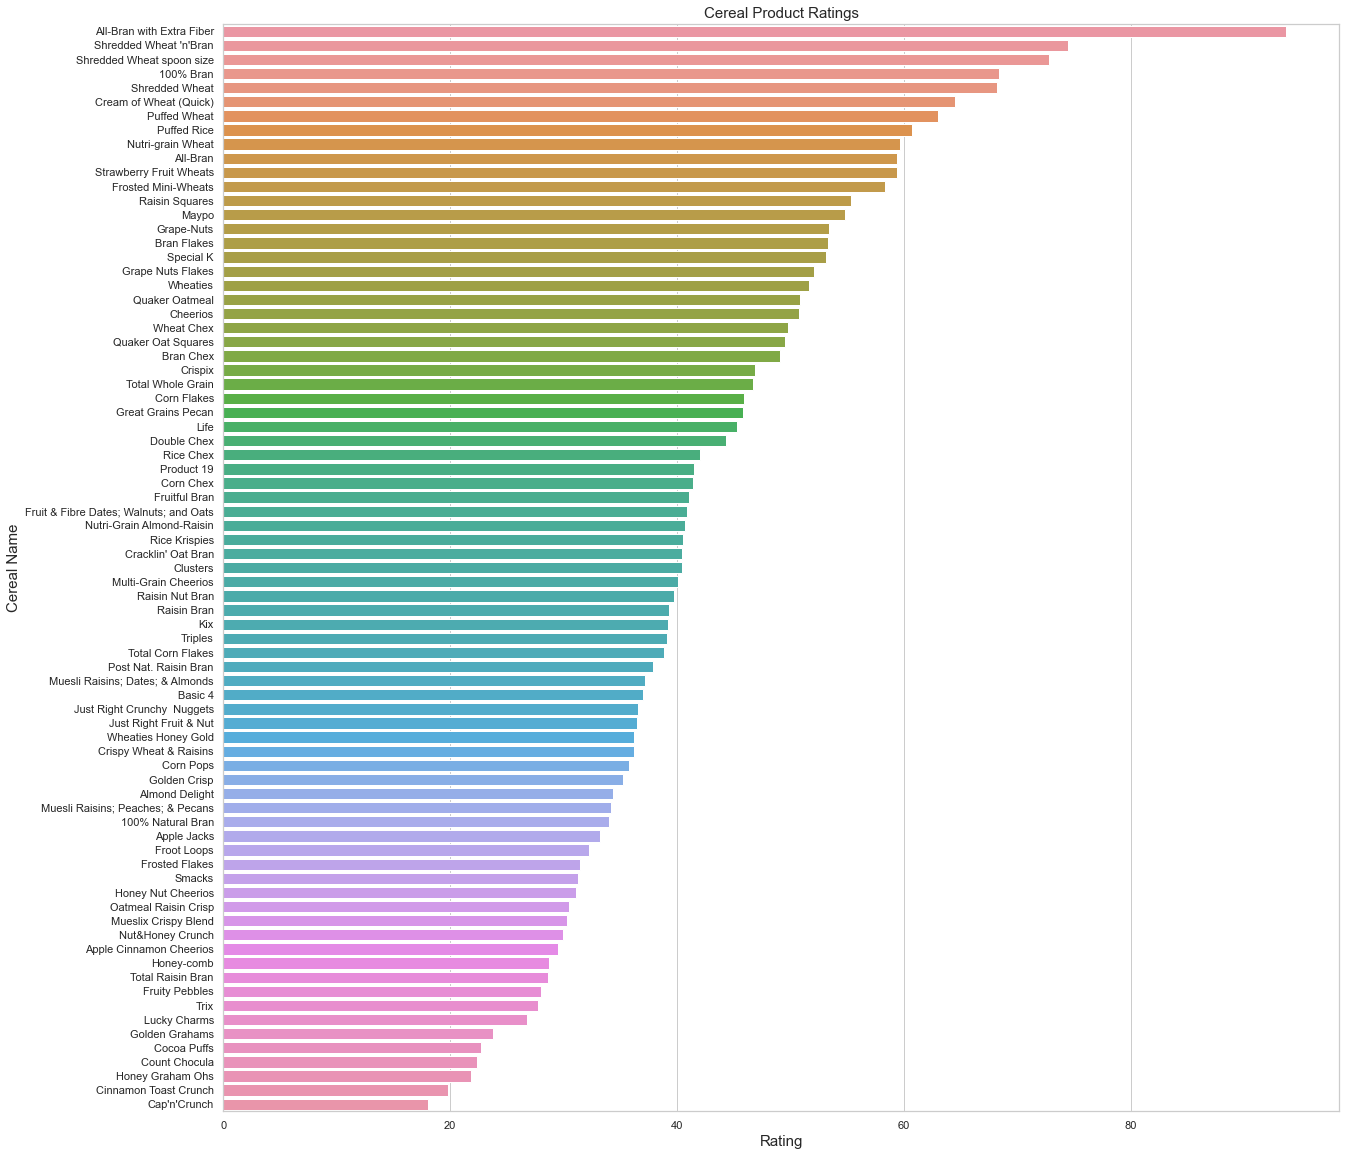

In [373]:
#Create DFs from highest to lowest ratings of cereals
cereal_ratingtop = cereal_data.sort_values(['rating'],ascending=False).reset_index(drop=True)
cereal_ratinglow = cereal_data.sort_values(['rating'],ascending=True).reset_index(drop=True)

#Graph to plot the product ratings of cereals
plt.figure(figsize=(20,20))
sns.barplot(x=cereal_ratingtop["rating"],y=cereal_ratingtop["name"])
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Cereal Name",fontsize=15)
plt.title("Cereal Product Ratings",fontsize=15)
plt.show()

Above are the top-rated cereals in terms of health by Consumer Reports, let's look at the top 5 highest and lowest rated cereals more closely below.

In [377]:
#Create a dataframe with top 5 rated cereals and the lowest 5 rated cereals
cereal_ratingtop = cereal_ratingtop.head(5)
cereal_ratinglow = cereal_ratinglow.head(5)
frames = [cereal_ratingtop, cereal_ratinglow]
df2 = pd.concat(frames)
df2.reset_index(drop=True, inplace=True) 


In [379]:
#View new dataframe
df2.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
1,Shredded Wheat 'n'Bran,Nabisco,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
2,Shredded Wheat spoon size,Nabisco,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
3,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
4,Shredded Wheat,Nabisco,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
5,Cap'n'Crunch,Quaker Oats,C,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851
6,Cinnamon Toast Crunch,General Mills,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
7,Honey Graham Ohs,Quaker Oats,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00,21.871292
8,Count Chocula,General Mills,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
9,Cocoa Puffs,General Mills,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446


How do the top rated and lowest rated cereals compare in nutritional value?

No handles with labels found to put in legend.


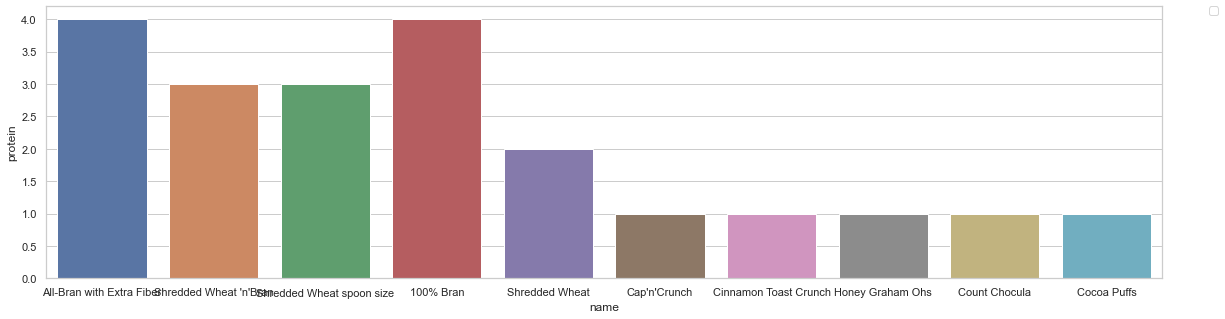

In [384]:
#Create barplot to compare protein content of top 5 and lowest 5 rated cereals
plt.figure(figsize=(20,5))
sns.barplot(x=df2["name"],y=df2["protein"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)


No handles with labels found to put in legend.


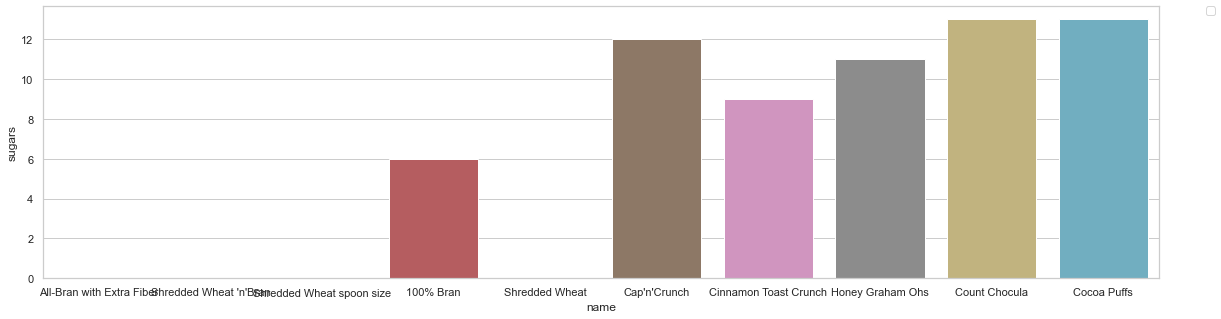

In [381]:
#Create barplot to compare sugar content of top 5 and lowest 5 rated cereals
plt.figure(figsize=(20,5))
sns.barplot(x=df2["name"],y=df2["sugars"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)

Purely looking at the protein content versus sugar content for the top 5 and bottom 5 rated cereals, it's clear the unhealthiest cereals have high sugar content and very low protein content.

# Conclusion

Next time you pick up a cereal box for breakfast, consider looking at the nutritional value per serving. The healthiest cereals will be high in protein, fiber, and potassium, and unhealthier cereals will have high sugar and caloric content. Particulary, consider avoiding: 
* Cap'n'Crunch, Cinnamon Toast Crunch, Honey Graham Ohs, Count Chocula, Cocoa Puffs (lowest Consumer Report rated cereals)
* Smacks, Golden Crisp, Raisin Bran (cereals with highest sugar content)
* Mueslix Crispy Blend, Muesli Raisins, Muesli Raisins; Peaches; & Pecans (cereals with highest caloric count)